# Playground for Ensemble Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2019-04-15 16:00:50.502390


In [1]:
import pandas as pd
pd.show_versions(as_json=False)

import sklearn
sklearn.__version__


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.14
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: 0.8.1
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplo

'0.22'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Resampling Strategies

In [3]:
#I.N: fabricate df (X represents features and y represents target)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])

In [4]:
#I.N: import ShuffleSplit from model_selection library
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=0) #I.N: n_splits represent the # of re-shuffling iterations
rs.get_n_splits(X)
print(rs)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
#observations: notice we are shuffling w/o replacement here (have repeated instances, mainly because of the size of our fabricated df)

10

ShuffleSplit(n_splits=10, random_state=0, test_size=0.25, train_size=None)
TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]
TRAIN: [4 2 0 5] TEST: [3 1]
TRAIN: [2 4 5 3] TEST: [0 1]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [4 5 2 0] TEST: [3 1]
TRAIN: [0 5 4 2] TEST: [1 3]


In [5]:
#I.N: KFold cross-validator

from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])
rs = KFold(n_splits=2, random_state=0) #I.N: n_splits represents the number of folds 
rs.get_n_splits(X)
print(rs)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
#observations: here we have sampling with replacement (we have two folds that are different)

C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


2

KFold(n_splits=2, random_state=0, shuffle=False)
TRAIN: [3 4 5] TEST: [0 1 2]
TRAIN: [0 1 2] TEST: [3 4 5]


In [6]:
# After experiementation, this random state generates a "good looking" dataset
r = 4184

X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, flip_y=0.09, class_sep = 1.1, random_state=r);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

feature_names = ['Age', 'Income']

In [17]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

def plot_boundaries(X_train, X_test, y_train, y_test, clf, clf_name, ax, hide_ticks=True):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    X = np.concatenate((X_train, X_test), axis=0)
    y = np.concatenate((y_train, y_test), axis=0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02));
    
    
    #score = clf.score(X_test, y_test);
    y_pred_tmp = clf.predict(X_test)
    score_str = "acc={:.2f}, kappa={:.2f}, f1={:.2f}".format(
        accuracy_score(y_test, y_pred_tmp),
        cohen_kappa_score(y_test, y_pred_tmp),
        f1_score(y_test, y_pred_tmp))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]);
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1];

    # Put the result into a color plot
    Z = Z.reshape(xx.shape);
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8);

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap=cm_bright, edgecolors='k');
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cm_bright, edgecolors='k', alpha=0.6);

    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    if hide_ticks:
        ax.set_xticks(());
        ax.set_yticks(());
    else:
        ax.tick_params(axis='both', which='major', labelsize=18);
        #ax.yticks(fontsize=18);
        
    ax.set_title(clf_name, fontsize=28);
    ax.text(xx.max() - .3, yy.min() + .3, score_str, size=22, horizontalalignment='right');
    ax.grid();
    
    


def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

## Committee/Voting

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier #I.N: import VotingClassifier from ensemble library

#I.N: here we create 3 classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)

classifiers = [('DT', clf1), ('KNN', clf2), ('SVM', clf3)]

#I.N: Here we apply our voting classifier
cclf = VotingClassifier(estimators=classifiers, voting='soft', weights=[2, 1, 2]) #I.N: can choose between soft or hard voting (revisit notes)

#I.N: fitting all 4 models (4th being the ensemble through voting)
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
cclf = cclf.fit(X_train, y_train)

Text(0.5, 1.0, 'DT')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'KNN')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'SVM')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Committee')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

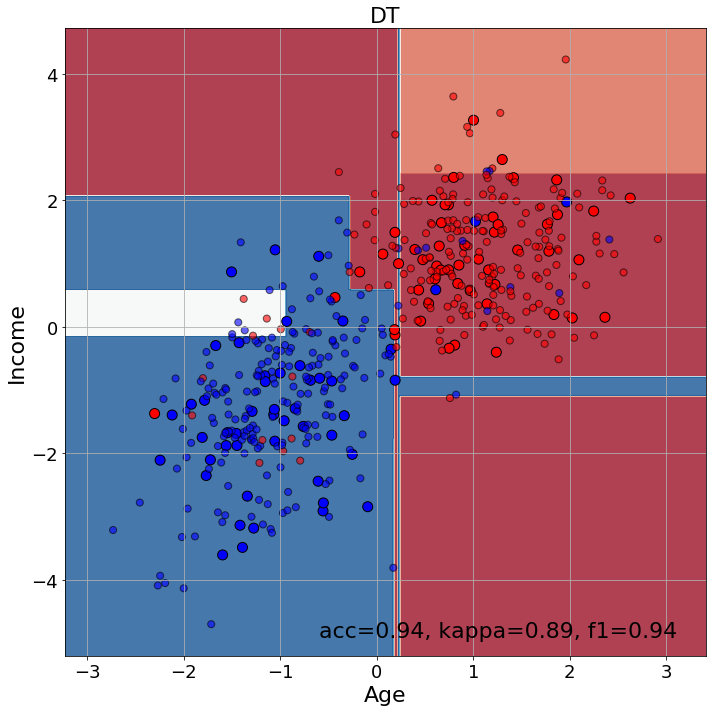

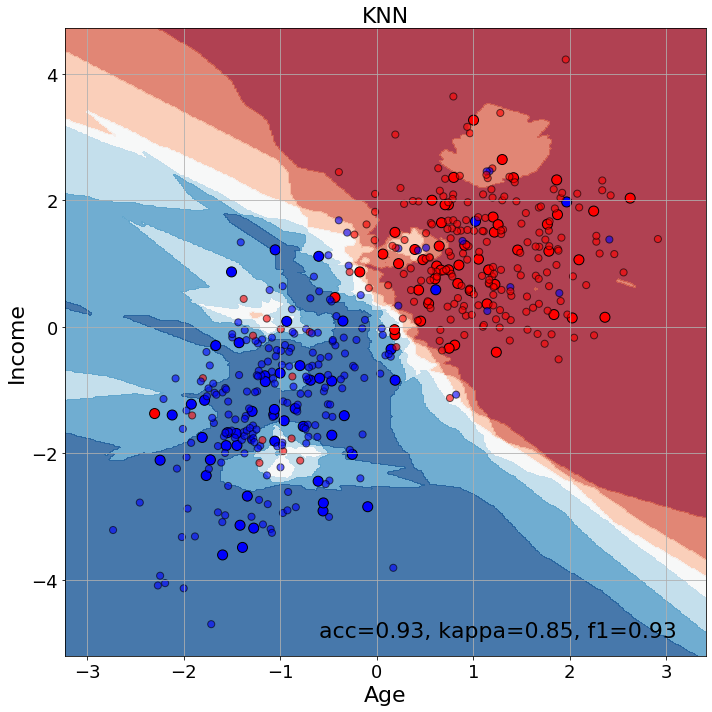

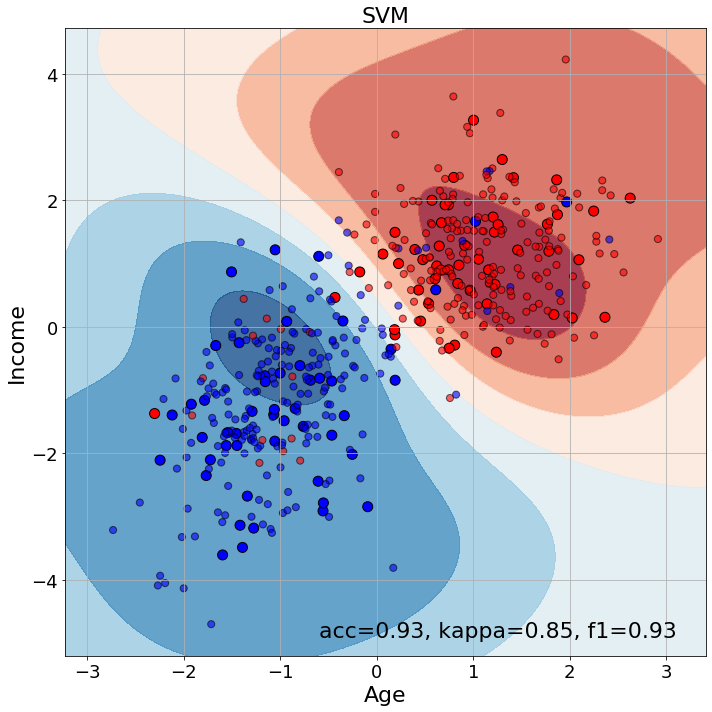

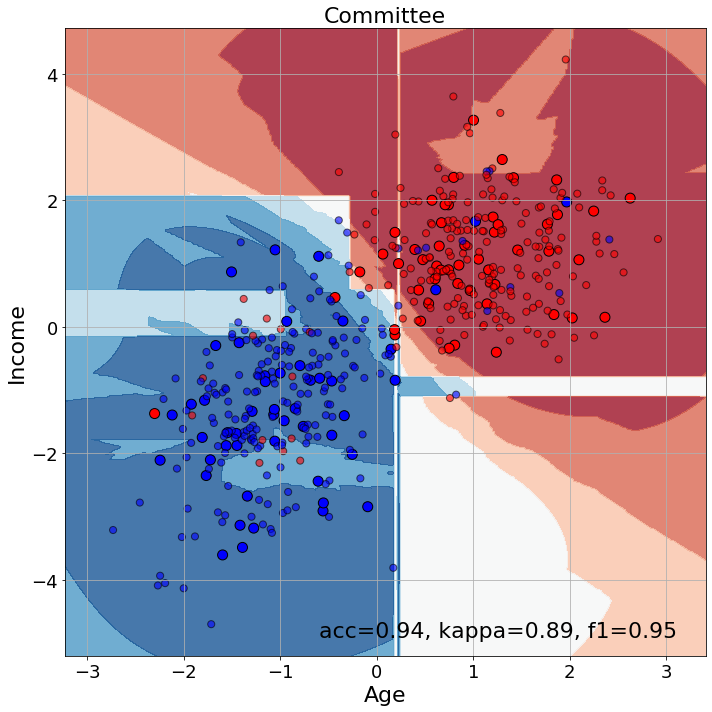

In [19]:
#I.N: plot decision boundaries for all 4 of our models

classifiers = classifiers + [('Committee', cclf)]

for clf_name, clf_tmp in classifiers:
    y_pred_tmp = clf_tmp.predict(X_test)
    
    figure = plt.figure(figsize=(10, 10));
    ax = plt.subplot(1, 1, 1);
    plot_boundaries(X_test, X_train, y_test, y_train, clf_tmp, "", ax, hide_ticks=False);
    ax.set_title(clf_name, fontsize=22);
    ax.set_xlabel("Age", fontsize=22);
    ax.set_ylabel("Income", fontsize=22);
    plt.tight_layout();
    #plt.savefig('out/default-voting-{}-boundaries.png'.format(clf_name));
    
#observations: Dtree = 94% acc & F1, KNN = 93% acc & F1, SVM = 93% acc & F1, Ensemble (Committee/Voting) = 94% acc & 95% F1
#we see our ensemble model improve accuracy!

# Bagging (with DTs)

In [20]:
from sklearn.ensemble import BaggingClassifier

#I.N: notice how we fit the decision tree classifier INSIDE the bagging classifier
clf_bag = BaggingClassifier(
    DecisionTreeClassifier(max_depth=None, min_samples_split=2),
    n_estimators=100, max_samples=.10, max_features=0.5,random_state=0)

clf_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


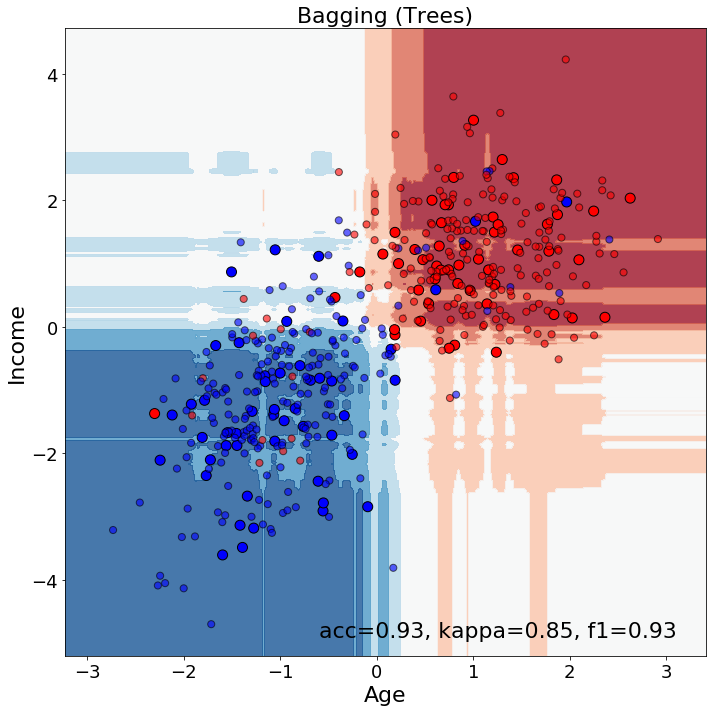

In [21]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X_test, X_train, y_test, y_train, clf_bag, "", ax, hide_ticks=False);
ax.set_title("Bagging (Trees)", fontsize=22);
ax.set_xlabel("Age", fontsize=22);
ax.set_ylabel("Income", fontsize=22);
plt.grid();
plt.tight_layout();
#plt.savefig('out/default-bagging-boundaries.png');

#observations: 93% accuracy from tree-bagging

Wall time: 6.13 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7EB0F2470>,
        cv=5, groups=None, logx=False, model=None, n_jobs=1,
        param_name='n_estimators',
        param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
        pre_dispatch='all', scoring='roc_auc')

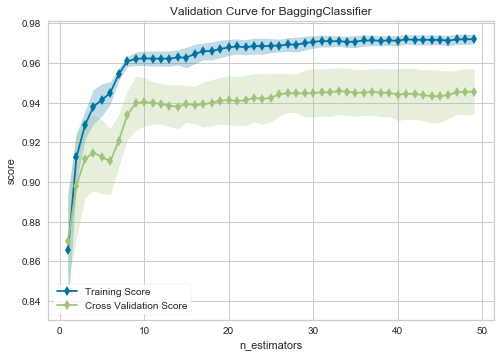

In [11]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve( BaggingClassifier(
    DecisionTreeClassifier(max_depth=None, min_samples_split=2),
    max_samples=.10, max_features=0.5,random_state=0), param_name="n_estimators", param_range=np.arange(1, 50), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
viz.poof(outpath='out/default-bagging-n_estimators.png')
viz.poof()

#observations: about 20 trees or so seems appropriate

# Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier #import random forest classifier

clf_rf = RandomForestClassifier(
    n_estimators=100, max_depth=None, min_samples_split=2, random_state=0) #create the random forest classifier

clf_rf.fit(X_train, y_train) #fit the random forest classifier to our training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

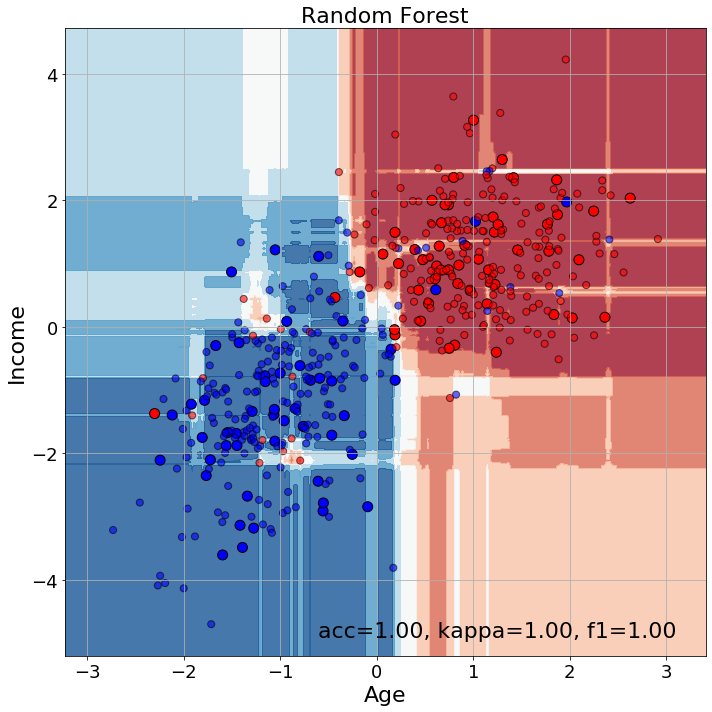

In [31]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X_test, X_train, y_test, y_train, clf_rf, "", ax, hide_ticks=False);
ax.set_title("Random Forest", fontsize=22);
ax.set_xlabel("Age", fontsize=22);
ax.set_ylabel("Income", fontsize=22);
plt.tight_layout();
#plt.savefig('out/default-rf-boundaries.png');

## Feature Importances

In [33]:
#I.N: from random forest, can examine feature importance

clf_rf.feature_importances_

array([0.5594513, 0.4405487])

In [34]:
values = sorted(zip(feature_names, clf_rf.feature_importances_), key=lambda x: x[1] * -1)
values

#observations: it appears as though age was the more important feature than income

[('Age', 0.5594513040145632), ('Income', 0.44054869598543683)]

C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Wall time: 26.6 s


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001E52D3A2908>,
                cv=5, groups=None, logx=False, model=None, n_jobs=1,
                param_name='n_estimators',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                pre_dispatch='all', scoring='roc_auc')

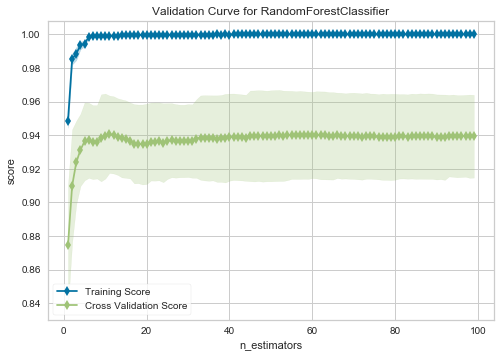

In [35]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=0), param_name="n_estimators", param_range=np.arange(1, 100), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
#viz.poof(outpath='out/default-rf-n_estimators.png')
viz.poof()

# Extra Trees
 From scikit-learn's docs:
 > In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias

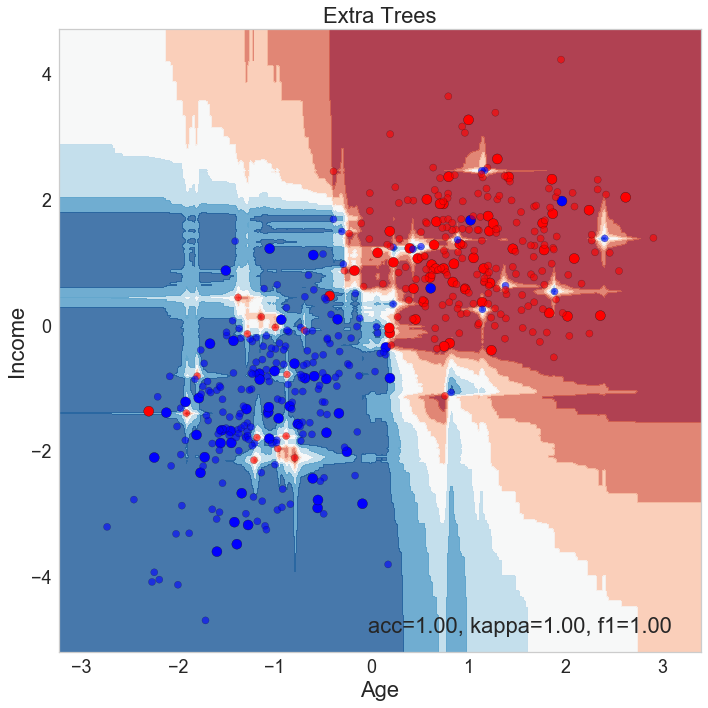

In [37]:
from sklearn.ensemble import ExtraTreesClassifier #import extra trees classifier from scikit

clf_et = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
clf_et.fit(X_train, y_train) #fit to our training data

figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X_test, X_train, y_test, y_train, clf_et, "", ax, hide_ticks=False);
ax.set_title("Extra Trees", fontsize=22);
ax.set_xlabel("Age", fontsize=22);
ax.set_ylabel("Income", fontsize=22);
plt.tight_layout();
#plt.savefig('out/default-extra-boundaries.png');

In [44]:
values = sorted(zip(feature_names, clf_et.feature_importances_), key=lambda x: x[1] * -1)
values

#observations: again, age is showing as the more important feature

[('Age', 0.6058153016569238), ('Income', 0.3941846983430763)]

C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Wall time: 22.7 s


C:\Users\ianno\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001E52B1CCF48>,
                cv=5, groups=None, logx=False, model=None, n_jobs=1,
                param_name='n_estimators',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                pre_dispatch='all', scoring='roc_auc')

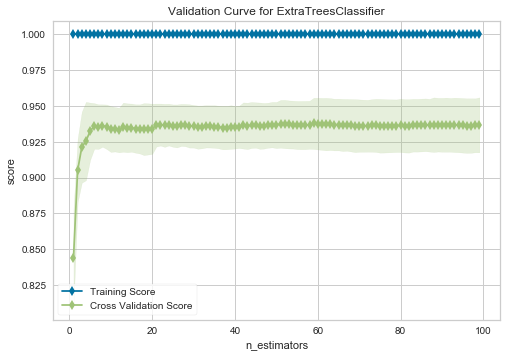

In [45]:
viz = ValidationCurve(ExtraTreesClassifier(max_depth=None, min_samples_split=2, random_state=0), param_name="n_estimators", param_range=np.arange(1, 100), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
#viz.poof(outpath='out/default-extra-n_estimators.png')
viz.poof()

# Adaboost
From scikit-learn:
> The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights , , …,  to each of the training samples. Initially, those weights are all set to , so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

In [20]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_split=2), 
    n_estimators=100, random_state=0)
clf_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=0)

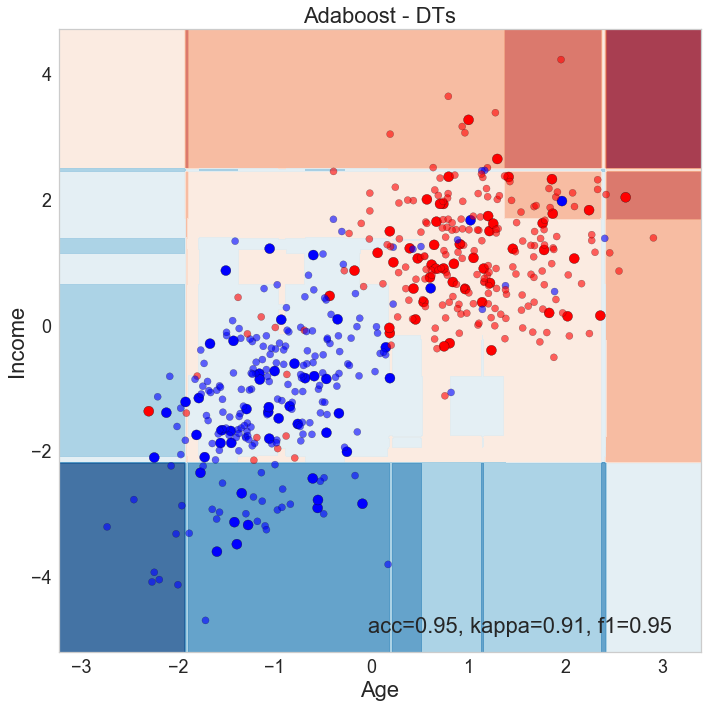

In [21]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X_test, X_train, y_test, y_train, clf_ada, "", ax, hide_ticks=False);
ax.set_title("Adaboost - DTs", fontsize=22);
ax.set_xlabel("Age", fontsize=22);
ax.set_ylabel("Income", fontsize=22);
plt.tight_layout();
plt.savefig('out/default-ada-boundaries.png');

Wall time: 27.3 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7EBFB5710>,
        cv=5, groups=None, logx=False, model=None, n_jobs=1,
        param_name='n_estimators',
        param_range=array([ 1,  2, ..., 98, 99]), pre_dispatch='all',
        scoring='roc_auc')

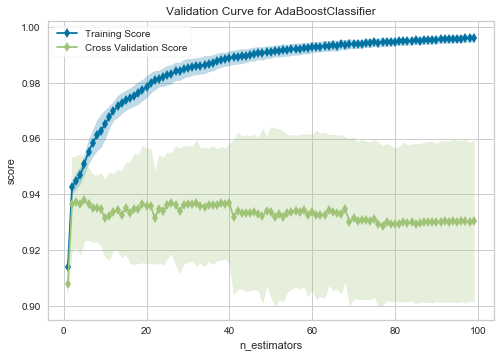

In [22]:
viz = ValidationCurve( AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=0), param_name="n_estimators", param_range=np.arange(1, 100), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
viz.poof(outpath='out/default-ada-n_estimators.png')
viz.poof()

# Gradiant Tree Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gt = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=1, max_features=1, 
    random_state=0)
clf_gt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

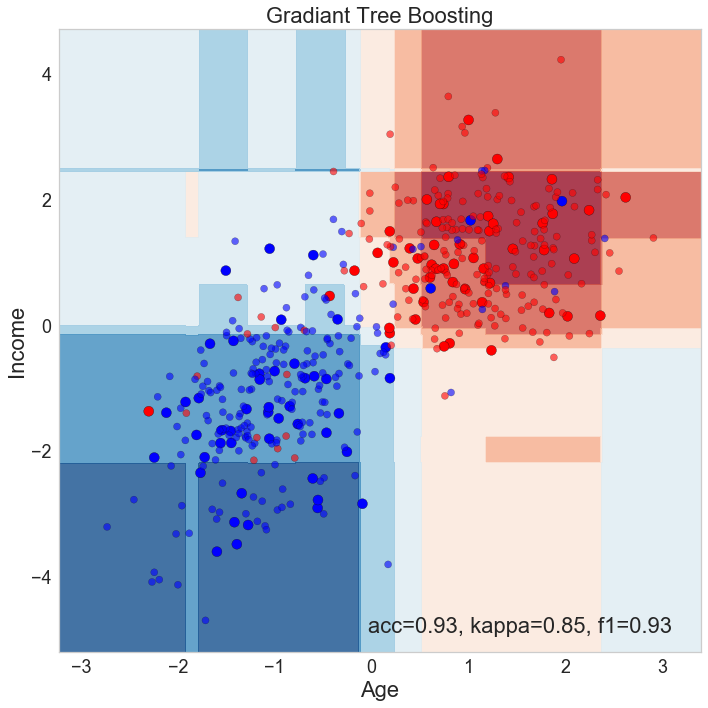

In [24]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X_test, X_train, y_test, y_train, clf_gt, "", ax, hide_ticks=False);
ax.set_title("Gradiant Tree Boosting", fontsize=22);
ax.set_xlabel("Age", fontsize=22);
ax.set_ylabel("Income", fontsize=22);
plt.tight_layout();
plt.savefig('out/default-gbm-boundaries.png');

Wall time: 3.61 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7EB19AB70>,
        cv=5, groups=None, logx=False, model=None, n_jobs=1,
        param_name='learning_rate',
        param_range=array([1.00000e-03, 6.99310e-02, 1.38862e-01, 2.07793e-01, 2.76724e-01,
       3.45655e-01, 4.14586e-01, 4.83517e-01, 5.52448e-01, 6.21379e-01,
       6.90310e-01, 7.59241e-01, 8.28172e-01, 8.97103e-01, 9.66034e-01,
       1.03497e+00, 1.10390e+00, 1.17283e+00, 1.24176e+00, 1.31069e+00,
       1.37962e+00, 1.44855e+00, 1.51748e+00, 1.58641e+00, 1.65534e+00,
       1.72428e+00, 1.79321e+00, 1.86214e+00, 1.93107e+00, 2.00000e+00]),
        pre_dispatch='all', scoring='roc_auc')

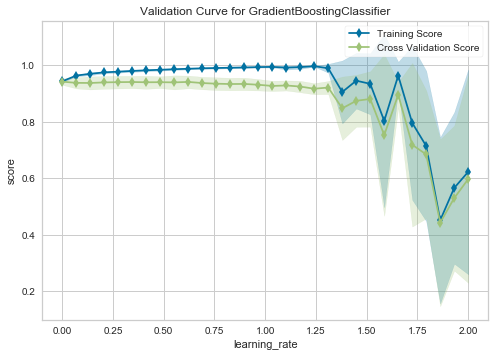

In [25]:
viz = ValidationCurve(GradientBoostingClassifier(n_estimators=100, max_depth=1, max_features=1, random_state=0), param_name="learning_rate", param_range=np.linspace(0.001,2,30), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
viz.poof(outpath='out/default-gbm-learning_rate.png')
viz.poof()

Wall time: 6.03 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7EBFC3A90>,
        cv=5, groups=None, logx=False, model=None, n_jobs=1,
        param_name='n_estimators',
        param_range=array([ 1,  2, ..., 98, 99]), pre_dispatch='all',
        scoring='roc_auc')

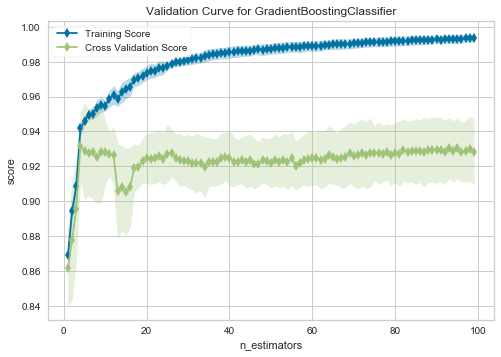

In [26]:
viz = ValidationCurve(GradientBoostingClassifier(learning_rate=1.0, max_depth=1, max_features=1, random_state=0), param_name="n_estimators", param_range=np.arange(1, 100), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
viz.poof(outpath='out/default-gbm-n_estimators.png')
viz.poof()

# XGBoost

In [61]:
from xgboost import XGBClassifier #I.N: import the XGB classifier from scikit
clf_xg = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.15) #establish the model
clf_xg.fit(X_train, y_train) #fit the XGBoost to training data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

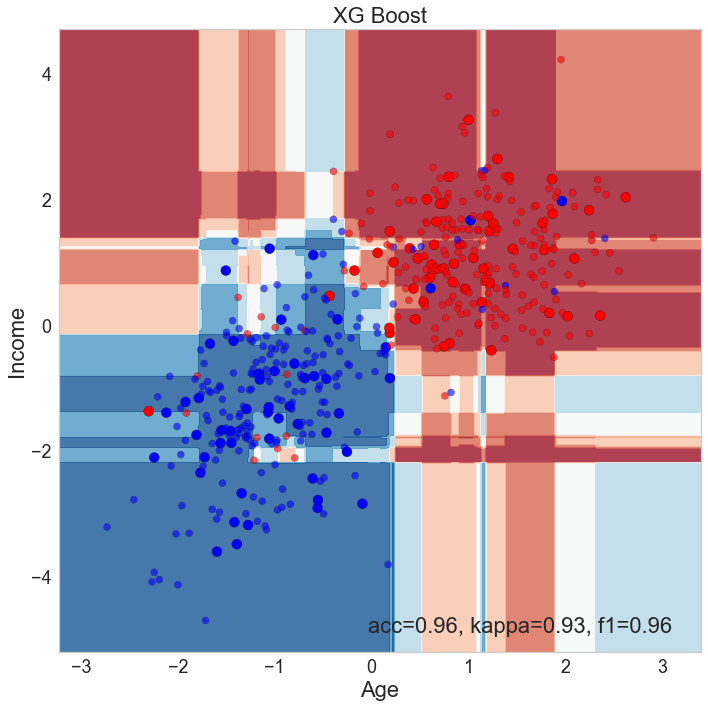

In [62]:
figure = plt.figure(figsize=(10, 10));
ax = plt.subplot(1, 1, 1);
plot_boundaries(X_test, X_train, y_test, y_train, clf_xg, "", ax, hide_ticks=False);
ax.set_title("XG Boost", fontsize=22);
ax.set_xlabel("Age", fontsize=22);
ax.set_ylabel("Income", fontsize=22);
plt.tight_layout();
#plt.savefig('out/default-xgboost-boundaries.png');

In [29]:
values = sorted(zip(feature_names, clf_xg.feature_importances_), key=lambda x: x[1] * -1)
values

#observations: our XGBoost actually returns that income waas the more important feature

[('Income', 0.53688526), ('Age', 0.46311477)]

Wall time: 3.2 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7EB7FFD30>,
        cv=5, groups=None, logx=False, model=None, n_jobs=1,
        param_name='learning_rate',
        param_range=array([1.00000e-03, 6.99310e-02, 1.38862e-01, 2.07793e-01, 2.76724e-01,
       3.45655e-01, 4.14586e-01, 4.83517e-01, 5.52448e-01, 6.21379e-01,
       6.90310e-01, 7.59241e-01, 8.28172e-01, 8.97103e-01, 9.66034e-01,
       1.03497e+00, 1.10390e+00, 1.17283e+00, 1.24176e+00, 1.31069e+00,
       1.37962e+00, 1.44855e+00, 1.51748e+00, 1.58641e+00, 1.65534e+00,
       1.72428e+00, 1.79321e+00, 1.86214e+00, 1.93107e+00, 2.00000e+00]),
        pre_dispatch='all', scoring='roc_auc')

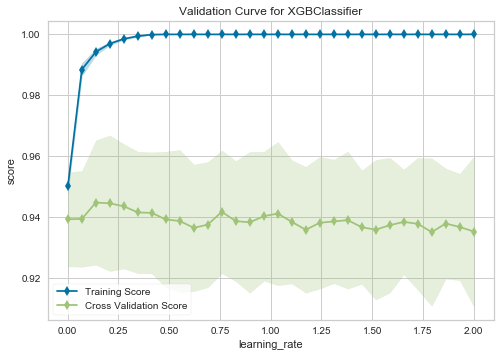

In [30]:
viz = ValidationCurve(XGBClassifier(n_estimators=100, max_depth=3, random_state=0), param_name="learning_rate", param_range=np.linspace(0.001,2,30), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
viz.poof(outpath='out/default-xgboost-learning_rate.png')
viz.poof()

#observations: learning rate of about 0.15 seems optimal (changed this in the above code (default is 0.1) increased accuracy from 95% to 96%)

Wall time: 6.22 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7EB7FF320>,
        cv=5, groups=None, logx=False, model=None, n_jobs=1,
        param_name='n_estimators',
        param_range=array([ 1,  2, ..., 98, 99]), pre_dispatch='all',
        scoring='roc_auc')

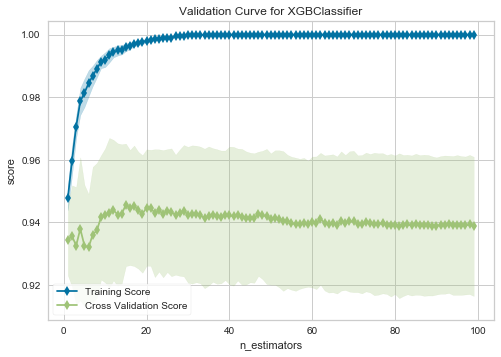

In [31]:
viz = ValidationCurve(XGBClassifier(learning_rate=1.0, max_depth=3, random_state=0), param_name="n_estimators", param_range=np.arange(1, 100), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
viz.poof(outpath='out/default-xgboost-n_estimators.png')
viz.poof()

# Stacking
From mlxtend:
> Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.

In [16]:
from mlxtend.classifier import StackingClassifier #import stacking classifier from m1xtend library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#I.N: we list out our various models that will be part of the ensemble
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)

classifiers=[('DT', clf1), ('KNN', clf2), ('SVM', clf3)]

sclf = StackingClassifier(
    classifiers=classifiers, meta_classifier=LogisticRegression(), 
    use_probas=True, average_probas=False)

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
sclf = cclf.fit(X_train, y_train) #this should be sclf.fit pretty sure...

TypeError: Cannot clone object ''DT'' (type <class 'str'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

Text(0.5, 1.0, 'DT')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'KNN')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'SVM')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Stacking (LR)')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Stacking (LR)')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

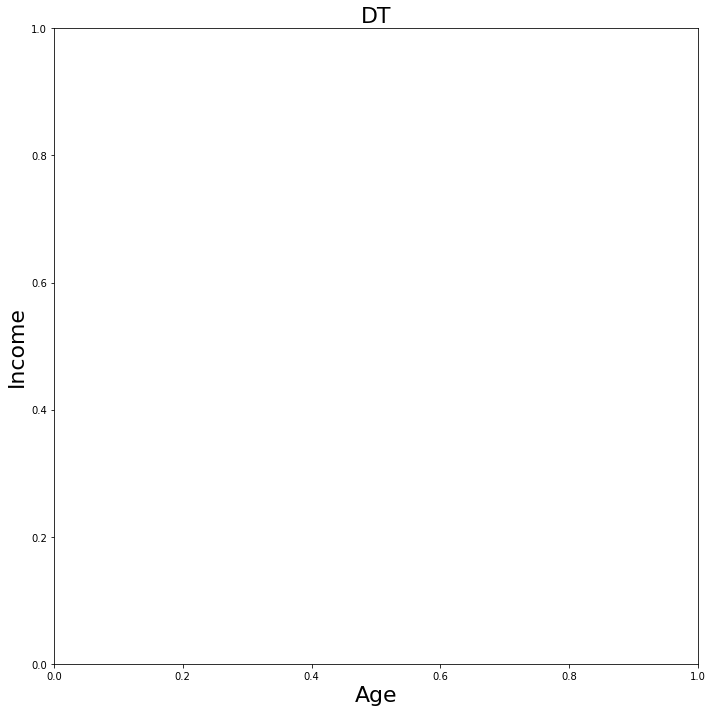

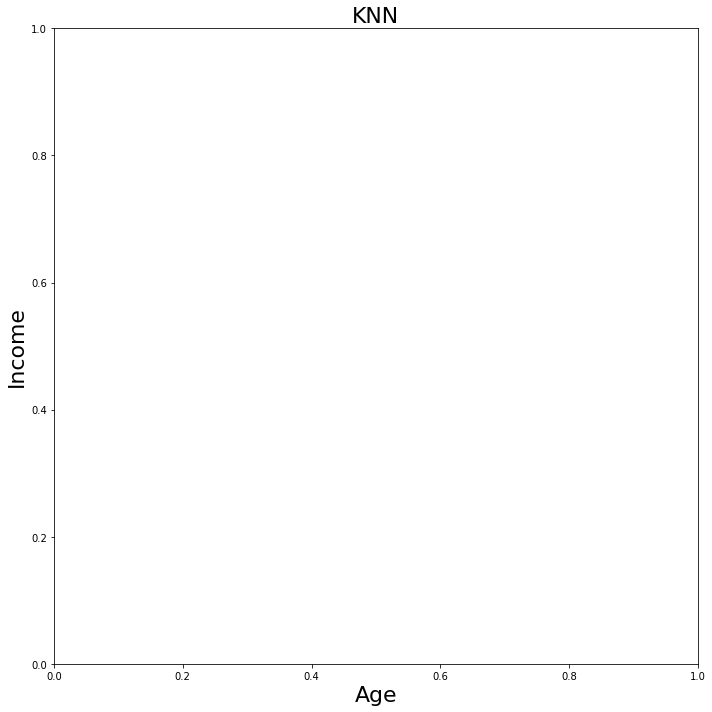

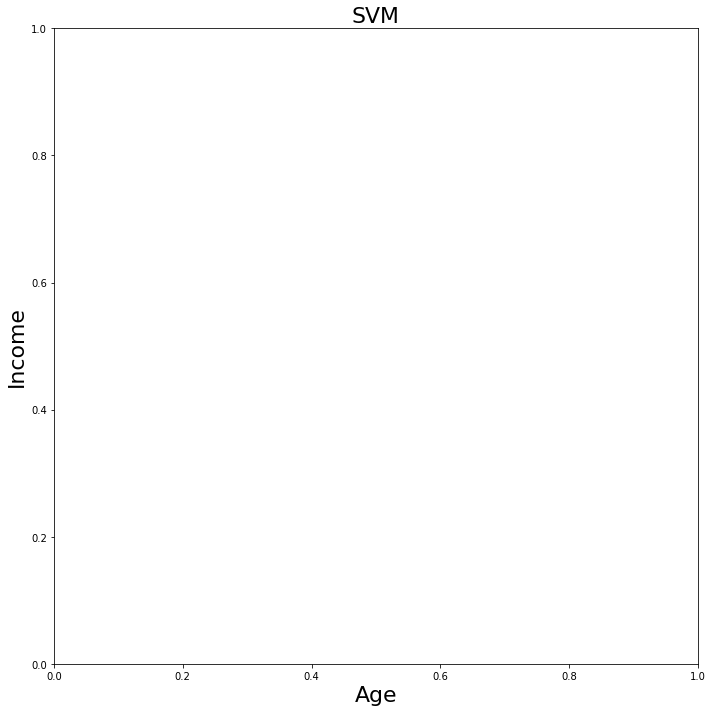

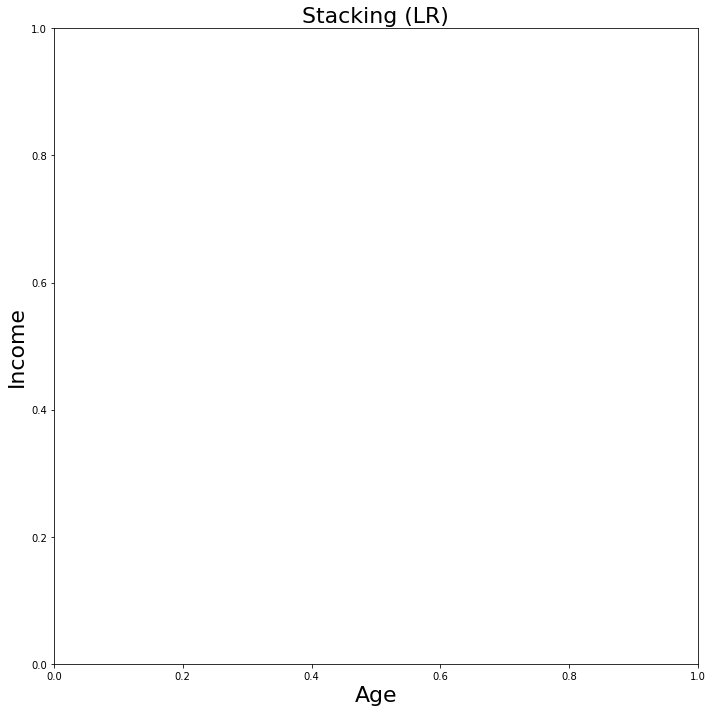

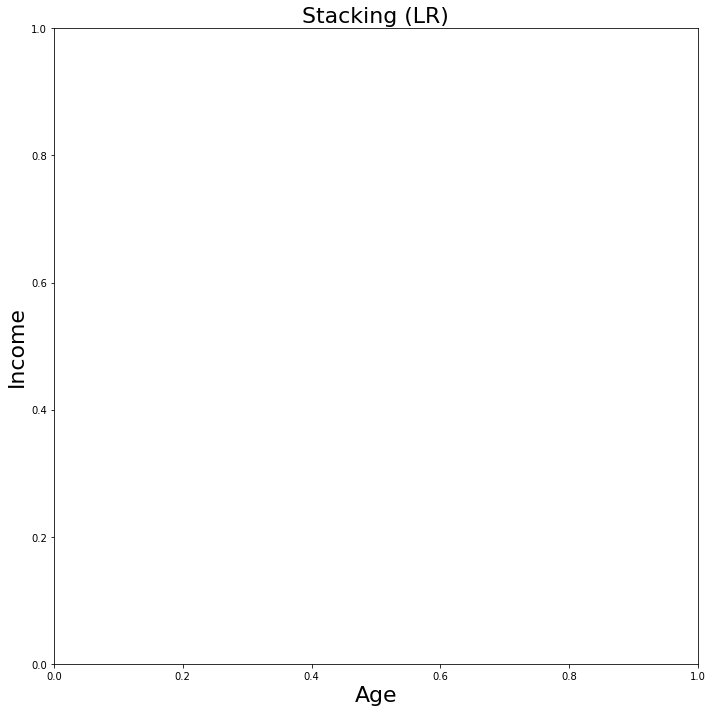

In [15]:
classifiers = classifiers + [('Stacking (LR)', cclf)]

for clf_name, clf_tmp in classifiers:
    y_pred_tmp = clf_tmp.predict(X_test)
    
    figure = plt.figure(figsize=(10, 10));
    ax = plt.subplot(1, 1, 1);
    plot_boundaries(X_test, X_train, y_test, y_train, clf_tmp, "", ax, hide_ticks=False);
    ax.set_title(clf_name, fontsize=22);
    ax.set_xlabel("Age", fontsize=22);
    ax.set_ylabel("Income", fontsize=22);
    plt.tight_layout();
    #plt.savefig('out/default-stacking-{}-boundaries.png'.format(clf_name));
    
#observations: notice that the ensemble model results in 0.95 F1-score (better than any of the individuals)